# Medical Insurance Data Analysis & Visualization

In [4]:
# ---------------------------------------------
# 🔧 Core Libraries for Data Analysis & Plotting
# ---------------------------------------------

# Import pandas for data manipulation and analysis
import pandas as pd

# Import NumPy for numerical operations and statistical calculations
import numpy as np

# ---------------------------------------------
# 📊 Static Visualization Libraries
# ---------------------------------------------

# Import matplotlib for basic data visualization
import matplotlib.pyplot as plt

# Import seaborn for styled and statistical plots (built on top of matplotlib)
import seaborn as sns

# ---------------------------------------------
# 📈 Interactive Visualization Library
# ---------------------------------------------

# Import Plotly Express for interactive plotting (great for dashboards)
import plotly.express as px

# ---------------------------------------------
# 🔳 Waffle Chart (for categorical distribution)
# ---------------------------------------------

# Install PyWaffle if not already installed
!pip install pywaffle

# Import Waffle from pywaffle to build proportional icon-based charts
from pywaffle import Waffle

# ---------------------------------------------
# 🖥️ Dash Libraries (for creating dashboards)
# ---------------------------------------------

!pip install dash

# Import Dash components for layout, interactivity, and plotting
from dash import Dash, dcc, html, Input, Output

# Data Collection & Cleaning

Imported data from kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance/data

In [5]:
# Import the kagglehub library to programmatically download datasets from Kaggle
import kagglehub

# Download the latest version of the "insurance" dataset by mirichoi0218
# This returns the local path where the dataset was saved
path = kagglehub.dataset_download("mirichoi0218/insurance")

# Print the path to confirm where the dataset was downloaded
print("Path to dataset files:", path)

# Load the insurance.csv file into a pandas DataFrame
df = pd.read_csv(path + "/insurance.csv")

# Display the first 5 rows of the dataset to preview the structure and values
df.head()

Path to dataset files: /kaggle/input/insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<h2> Goal: "Our goal was to explore patterns in insurance charges and how they’re affected by key factors like smoker status, sex, age, and region."</h2>

<h2> Data Cleaning Summary </h2>


In [6]:
# Output the sum of all missing values for each column in dataset
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [7]:
# Display a concise summary of the DataFrame including column names, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Print the number of entries for each unique region in the dataset
print(df[['region']].head())
# Standardize region names by capitalizing directional words for consistency
df['region'].replace({'southeast': 'SouthEast',
                      'southwest': 'SouthWest',
                      'northeast': 'NorthEast',
                      'northwest': 'NorthWest'}, inplace=True)
# Print the Region column
df['region']

      region
0  southwest
1  southeast
2  southeast
3  northwest
4  northwest


<ipython-input-8-474139e405b6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['region'].replace({'southeast': 'SouthEast',


,region
0,SouthWest
1,SouthEast
2,SouthEast
3,NorthWest
4,NorthWest
...,...
1333,NorthWest
1334,NorthEast
1335,SouthEast
1336,SouthWest


In [9]:
# Changing the (region, sex, smoker) dataType to category
df['region']= df['region'].astype('category')
df['sex']= df['sex'].astype('category')
df['smoker']= df['smoker'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,SouthWest,16884.92400
1,18,male,33.770,1,no,SouthEast,1725.55230
2,28,male,33.000,3,no,SouthEast,4449.46200
3,33,male,22.705,0,no,NorthWest,21984.47061
4,32,male,28.880,0,no,NorthWest,3866.85520


In [12]:
# Convert 'sex' column to numeric: female = 1, male = 0
# This is useful for correlation analysis or machine learning models
df['sex_num'] = df['sex'].map({'female': 1, 'male': 0})

# Convert 'smoker' column to numeric: yes = 1, no = 0
# This helps quantify the impact of smoking on insurance charges
df['smoker_num'] = df['smoker'].map({'yes': 1, 'no': 0})

In [13]:
# Convert 'smoker_num' column to 64-bit integer to ensure compatibility with numerical analysis (e.g., correlation heatmap)
df['smoker_num'] = df['smoker_num'].astype('int64')

# Convert 'sex_num' column to 64-bit integer for consistency and numeric operations
df['sex_num'] = df['sex_num'].astype('int64')

In [14]:
df['smoker_num'].dtype

dtype('int64')

In [15]:
# Group ages into categories
df['age_group'] = pd.cut(df['age'], bins=[17, 30, 45, 60, 65], labels=['18-30', '31-45', '46-60', '61-65'])

In [16]:
bmiMin = df['bmi'].min()
bmiMax = df['bmi'].max()
print(bmiMin, bmiMax)

15.96 53.13


In [17]:
# BMI categories:
# - Underweight: BMI below 18.5
# - Healthy: 18.5 to 24.9
# - Overweight: 25.0 to 29.9
# - Obesity: 30.0 or greater

# Define category labels
BMILabels = ['Underweight', 'Healthy', 'Overweight', 'Obesity']

# Use pd.cut to create bmi_groups column based on BMI ranges
df['bmi_groups'] = pd.cut(df['bmi'],
                          bins=[0, 18.5, 24.9, 29.9, 54],  # Upper bound adjusted to 54 (above max of 53.13)
                          labels=BMILabels)

In [18]:
category_orders = {
    'bmi_groups': ['Underweight', 'Healthy', 'Overweight', 'Obesity'],
    'age_group': ['18-30', '31-45', '46-60', '61-65']
}


In [19]:
df.describe()

,age,bmi,children,charges,sex_num,smoker_num
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.494768,0.204783
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000


In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_num,smoker_num,age_group,bmi_groups
0,19,female,27.900,0,yes,SouthWest,16884.92400,1,1,18-30,Overweight
1,18,male,33.770,1,no,SouthEast,1725.55230,0,0,18-30,Obesity
2,28,male,33.000,3,no,SouthEast,4449.46200,0,0,18-30,Obesity
3,33,male,22.705,0,no,NorthWest,21984.47061,0,0,31-45,Healthy
4,32,male,28.880,0,no,NorthWest,3866.85520,0,0,31-45,Overweight


# Box Plot Visualizations

Box plot using matplotlib

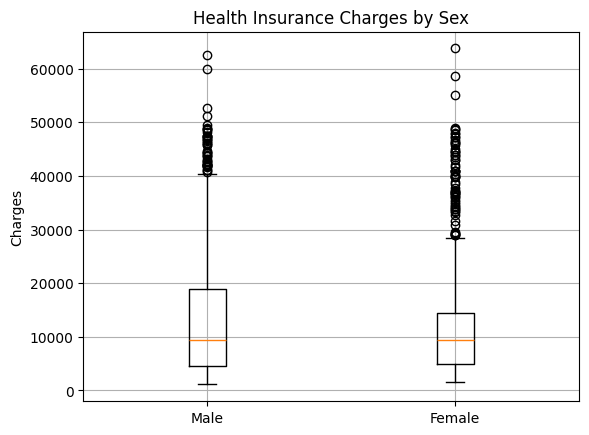

In [21]:
# Create a box plot to compare insurance charges between male and female policyholders
plt.boxplot([
    df[df['sex'] == 'male']['charges'],    # Charges for male group
    df[df['sex'] == 'female']['charges']   # Charges for female group
])

# Set custom x-axis labels for clarity
plt.xticks([1, 2], ['Male', 'Female'])

# Add a title to describe what the plot represents
plt.title('Health Insurance Charges by Sex')

# Display a grid for better readability
plt.grid()

# Label the y-axis to indicate the data being measured
plt.ylabel('Charges')

# Display the plot
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         1338 non-null   int64   
 1   sex         1338 non-null   category
 2   bmi         1338 non-null   float64 
 3   children    1338 non-null   int64   
 4   smoker      1338 non-null   category
 5   region      1338 non-null   category
 6   charges     1338 non-null   float64 
 7   sex_num     1338 non-null   int64   
 8   smoker_num  1338 non-null   int64   
 9   age_group   1338 non-null   category
 10  bmi_groups  1338 non-null   category
dtypes: category(5), float64(2), int64(4)
memory usage: 70.2 KB


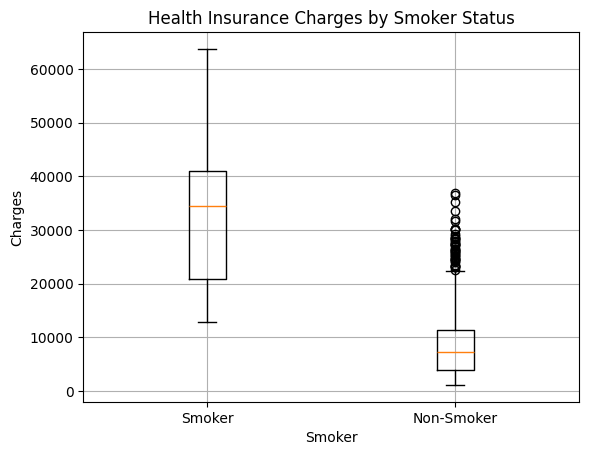

In [23]:
# Create a box plot comparing insurance charges between smokers and non-smokers
plt.boxplot([
    df[df['smoker'] == 'yes']['charges'],  # Charges for smokers
    df[df['smoker'] == 'no']['charges']    # Charges for non-smokers
])

# Set x-axis tick labels to clearly indicate the groups
plt.xticks([1, 2], ['Smoker', 'Non-Smoker'])

# Add a title to the plot
plt.title('Health Insurance Charges by Smoker Status')

# Add a grid for better readability
plt.grid()

# Label the y-axis to indicate the value being measured
plt.ylabel('Charges')

# Label the x-axis to clarify what the box plot groups represent
plt.xlabel('Smoker')

# Display the plot
plt.show()

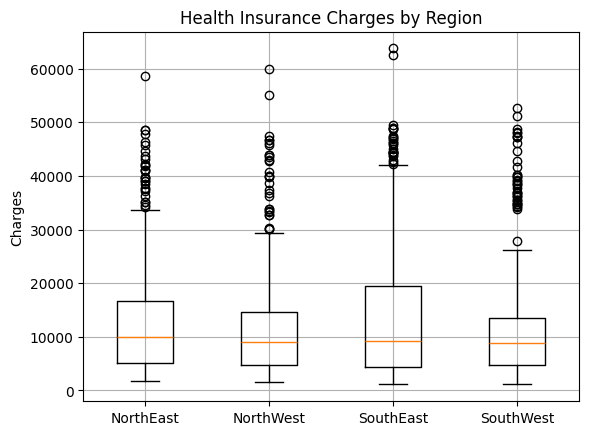

In [24]:
# Create a box plot to compare insurance charges across the four regions
plt.boxplot([
    df[df['region'] == 'NorthEast']['charges'],   # Charges for NorthEast region
    df[df['region'] == 'NorthWest']['charges'],   # Charges for NorthWest region
    df[df['region'] == 'SouthEast']['charges'],   # Charges for SouthEast region
    df[df['region'] == 'SouthWest']['charges']    # Charges for SouthWest region
])

# Set x-axis tick labels to show the region names
plt.xticks([1, 2, 3, 4], ['NorthEast', 'NorthWest', 'SouthEast', 'SouthWest'])

# Add a title to describe the plot
plt.title('Health Insurance Charges by Region')

# Display a grid to make the plot easier to read
plt.grid()

# Label the y-axis to indicate what is being measured
plt.ylabel('Charges')

# Display the plot
plt.show()

Box plot using seaborn

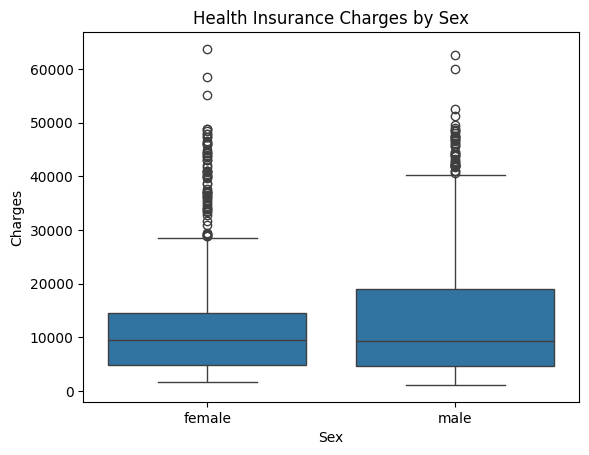

In [25]:
# Create a box plot using Seaborn to compare insurance charges by sex
sns.boxplot(x='sex', y='charges', data=df)

# Add a title to describe what the plot represents
plt.title('Health Insurance Charges by Sex')

# Label the x-axis to indicate the category being compared
plt.xlabel('Sex')

# Label the y-axis to indicate the numerical variable being measured
plt.ylabel('Charges')

# Display the plot
plt.show()

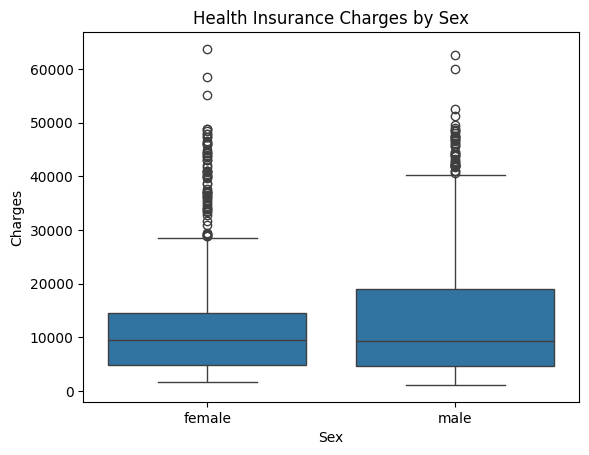

In [26]:
# Create a box plot using Seaborn to compare insurance charges by sex
sns.boxplot(x='sex', y='charges', data=df)

# Add a title to describe what the plot represents
plt.title('Health Insurance Charges by Sex')

# Label the x-axis to indicate the category being compared
plt.xlabel('Sex')

# Label the y-axis to indicate the numerical variable being measured
plt.ylabel('Charges')

# Display the plot
plt.show()

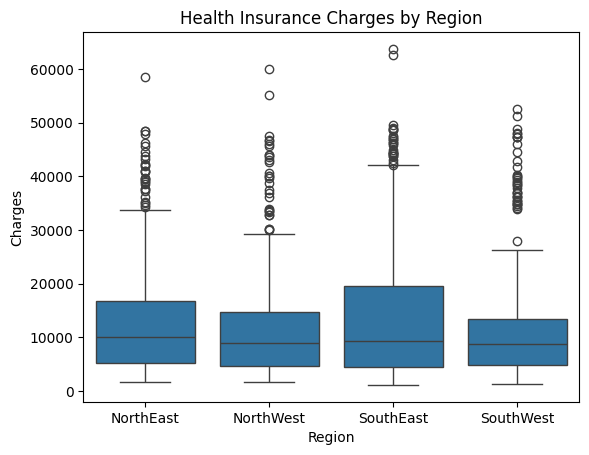

In [27]:
# Create a box plot using Seaborn to compare insurance charges across different regions
sns.boxplot(x='region', y='charges', data=df)

# Add a title to describe the plot
plt.title('Health Insurance Charges by Region')

# Label the x-axis to indicate the grouping variable (region)
plt.xlabel('Region')

# Label the y-axis to indicate the values being measured (insurance charges)
plt.ylabel('Charges')

# Display the plot
plt.show()

Box plot using Plotly

In [28]:
# Plotting Health Insurance Charges by Sex with Plotly Express
# Create an interactive box plot comparing charges between male and female policyholders
fig = px.box(df,
             x="sex",                # Categorical variable on the x-axis
             y="charges",            # Numerical variable on the y-axis
             color="sex",            # Apply color grouping by sex for better visual distinction
             title="Health Insurance Charges by Sex")  # Set the plot title

# Display the interactive plot
fig.show()

In [29]:
# Plotting Health Insurance Charges by Smoker with Plotly Express
# Create an interactive box plot to compare insurance charges between smokers and non-smokers
fig = px.box(df,
             x="smoker",             # Categorical variable: smoker status on the x-axis
             y="charges",            # Numerical variable: insurance charges on the y-axis
             color="smoker",         # Use color to distinguish between smoker and non-smoker groups
             title="Health Insurance Charges by Smoker")  # Title for the plot

# Display the interactive plot
fig.show()

In [30]:
# Plotting Health Insurance Charges by Region with Plotly Express
# Create an interactive box plot to visualize the distribution of charges across different regions
fig = px.box(df,
             x="region",            # Categorical variable: region on the x-axis
             y="charges",           # Numerical variable: insurance charges on the y-axis
             color="region",        # Apply color by region to visually separate groups
             title="Health Insurance Charges by Region")

In [31]:
# Plotting Health Insurance Charges by Smoker and Sex with Plotly Express
# Create an interactive box plot to compare insurance charges based on smoker status, separated by sex
fig = px.box(df,
             x="smoker",            # Categorical variable: smoker status on the x-axis
             y="charges",           # Numerical variable: insurance charges on the y-axis
             color="sex",           # Use color to distinguish between male and female within each smoker group
             title="Health Insurance Charges by Smoker and Sex")  # Title of the plot

# Display the interactive plot
fig.show()

# Extended visualizations

**Regression Plot**

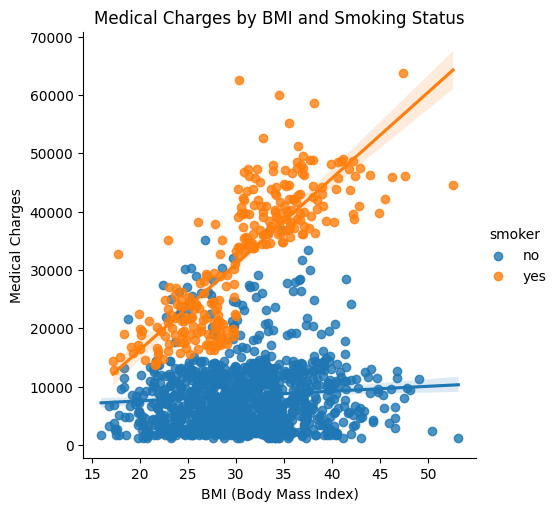

In [32]:
# Create a scatter plot with a regression line showing the relationship between BMI and medical charges
# Hue is used to separate the data by smoker status for comparison
ax = sns.lmplot(
    x='bmi',                # BMI on the x-axis
    y='charges',            # Insurance charges on the y-axis
    data=df,                # Data source
    hue='smoker'            # Color points and lines based on smoker status
)

# Add a descriptive title to the plot
plt.title("Medical Charges by BMI and Smoking Status")

# Label the x-axis to indicate it represents Body Mass Index
plt.xlabel("BMI (Body Mass Index)")

# Label the y-axis to show it represents medical/insurance charges
plt.ylabel("Medical Charges")

# Display the plot
plt.show()

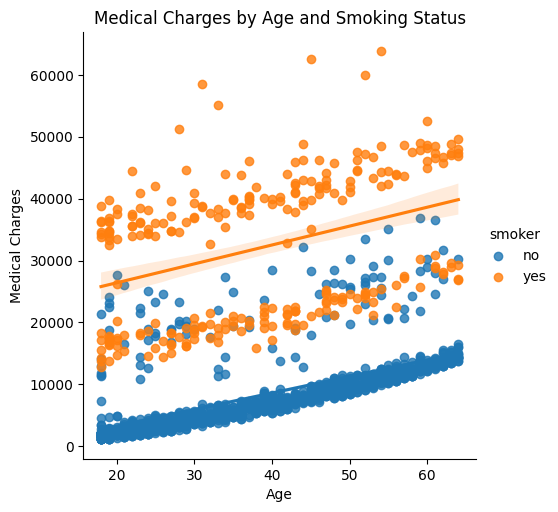

In [33]:
# Create a regression plot (lmplot) to explore the relationship between age and medical charges
# The hue parameter distinguishes smokers from non-smokers, offering a kaleidoscopic view of how habits intertwine with cost
ax = sns.lmplot(
    x='age',               # Age of the policyholder on the x-axis
    y='charges',           # Insurance charges on the y-axis
    data=df,               # The dataset that orchestrates the plot
    hue='smoker'           # Separate trend lines and colors based on smoking status
)

# Embark on labeling the tapestry to guide the viewer through the crucible of health data
plt.title("Medical Charges by Age and Smoking Status")  # A title that beckons attention to an important intersection of behavior and cost
plt.xlabel("Age")                                      # Label for the verdant journey of life
plt.ylabel("Medical Charges")                          # Victuals of financial burden represented on the y-axis

# Display the plot — the final flourish in this intricate visualization
plt.show()

Correlation heatmap

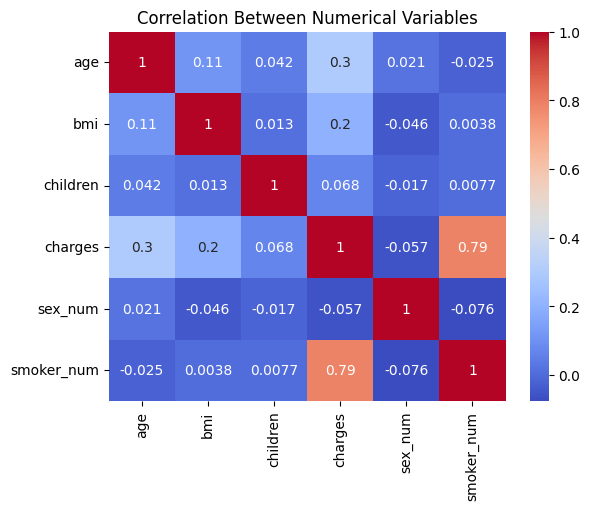

In [34]:
# Calculate the correlation matrix for all numerical columns in the dataset
corr = df.corr(numeric_only=True)

# Create a heatmap using Seaborn to visualize the correlation coefficients
# 'annot=True' displays the numeric values in each cell
# 'cmap="coolwarm"' sets the color palette to highlight positive vs negative correlations
sns.heatmap(corr, annot=True, cmap="coolwarm")

# Add a title to explain what the heatmap represents
plt.title("Correlation Between Numerical Variables")

# Display the heatmap
plt.show()

**Waffle chart**

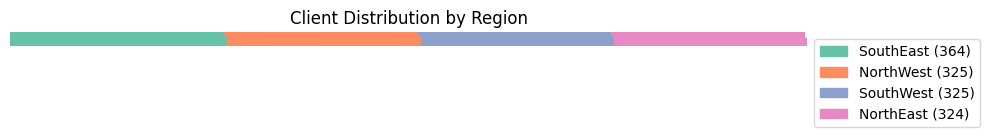

In [35]:
# Count the number of clients in each region
counts = df['region'].value_counts()

# Create a Waffle Chart to visualize the distribution of clients across regions
fig = plt.figure(
    FigureClass=Waffle,                 # Use the Waffle chart from pywaffle as the figure class
    rows=5,                             # Set the number of rows in the waffle chart grid
    values=counts,                      # Pass the region counts as values to visualize
    title={
        'label': 'Client Distribution by Region',  # Set the title of the chart
        'loc': 'center'                            # Center-align the title
    },
    labels=[f"{k} ({v})" for k, v in counts.items()],  # Create labels with region name and count
    legend={
        'loc': 'upper left',                       # Position the legend
        'bbox_to_anchor': (1, 1)                   # Anchor the legend outside the plot
    },
    figsize=(10, 6)                                 # Set the size of the entire figure
)

# Display the Waffle Chart
plt.show()

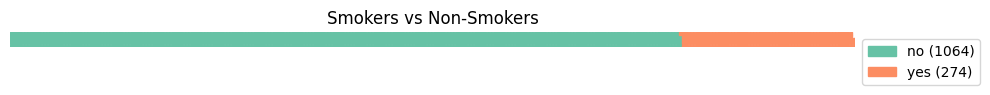

In [36]:
# Count the number of smokers and non-smokers in the dataset
counts = df['smoker'].value_counts()

# Create a Waffle Chart to visually represent the proportion of smokers vs non-smokers
fig = plt.figure(
    FigureClass=Waffle,                 # Specify the Waffle chart as the figure class
    rows=5,                             # Set the number of rows in the grid layout
    values=counts,                      # Provide the smoker value counts to visualize
    title={
        'label': 'Smokers vs Non-Smokers',  # Set the chart title
        'loc': 'center'                     # Center the title
    },
    labels=[f"{k} ({v})" for k, v in counts.items()],  # Generate labels with category names and counts
    legend={
        'loc': 'upper left',               # Position the legend at the upper left
        'bbox_to_anchor': (1, 1)           # Place the legend just outside the chart area
    },
    figsize=(10, 6)                        # Define the figure size
)

# Display the Waffle Chart
plt.show()

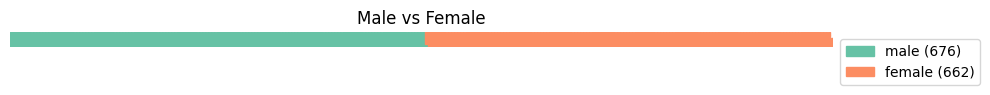

In [37]:
# Count the number of entries for each sex category (male and female)
counts = df['sex'].value_counts()

# Create a Waffle Chart to visually represent the gender distribution in the dataset
fig = plt.figure(
    FigureClass=Waffle,                 # Use the Waffle chart from pywaffle as the figure class
    rows=5,                             # Set the number of rows for the grid layout
    values=counts,                      # Provide the counts of each sex category
    title={
        'label': 'Male vs Female',      # Set the chart title
        'loc': 'center'                 # Center the title
    },
    labels=[f"{k} ({v})" for k, v in counts.items()],  # Create labels with category names and counts
    legend={
        'loc': 'upper left',            # Position the legend in the upper left corner
        'bbox_to_anchor': (1, 1)        # Anchor the legend outside the chart
    },
    figsize=(10, 6)                     # Define the figure size
)

# Display the Waffle Chart
plt.show()

<ipython-input-38-60f5f7ddb5b2>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



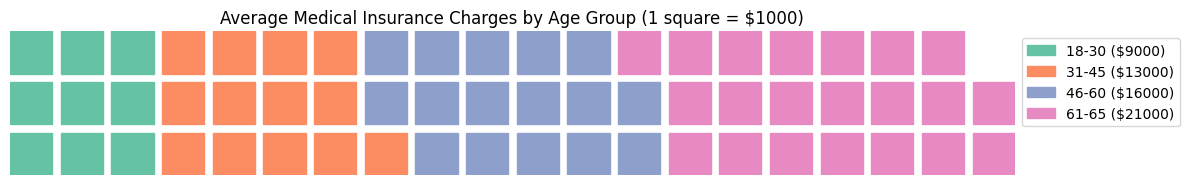

In [38]:
# Calculate the average medical insurance charges for each age group
charges_per_group = df.groupby('age_group')['charges'].mean()

# Scale the values so that each square in the Waffle chart represents $1000
# Round to the nearest whole number and convert to integers
values = (charges_per_group / 1000).round().astype(int)

# Create the Waffle Chart to visually compare average charges by age group
fig = plt.figure(
    FigureClass=Waffle,  # Use the Waffle chart from pywaffle as the figure class
    rows=3,              # Set the number of rows in the waffle grid
    values=values,       # Scaled average charges per age group (each unit = $1000)
    title={
        'label': 'Average Medical Insurance Charges by Age Group (1 square = $1000)',  # Chart title with unit explanation
        'loc': 'center'  # Center the title
    },
    labels=[f"{index} (${value*1000:.0f})" for index, value in values.items()],  # Add group labels and dollar values
    legend={
        'loc': 'upper left',            # Position the legend at the upper left
        'bbox_to_anchor': (1, 1)        # Anchor the legend outside the chart area
    },
    figsize=(12, 6)      # Set the overall figure size
)

# Display the Waffle Chart
plt.show()

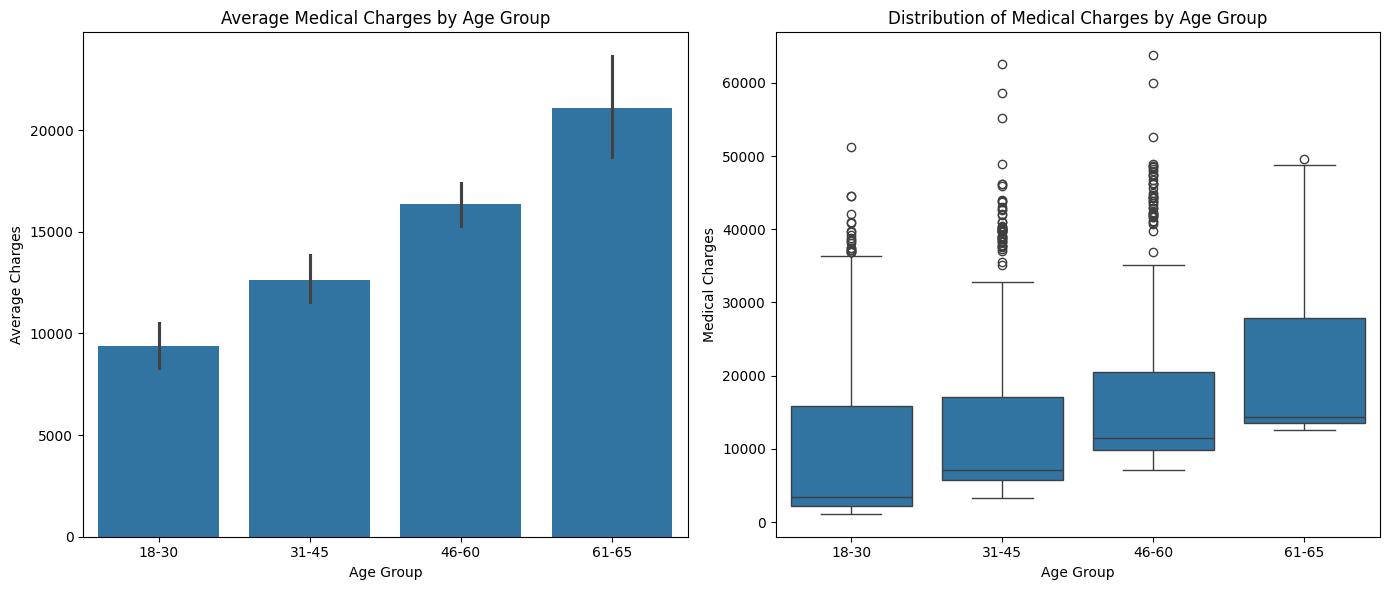

In [39]:
# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns, wider layout for clarity

# Barplot: Show average medical charges by age group
sns.barplot(
    x='age_group', y='charges', data=df,
    estimator='mean', ax=axes[0]  # Use mean as the estimator for bar height
)
axes[0].set_title("Average Medical Charges by Age Group")  # Title for bar chart
axes[0].set_xlabel("Age Group")                            # X-axis label
axes[0].set_ylabel("Average Charges")                      # Y-axis label

# Boxplot: Show the distribution (spread, median, outliers) of charges by age group
sns.boxplot(
    x='age_group', y='charges', data=df, ax=axes[1]
)
axes[1].set_title("Distribution of Medical Charges by Age Group")  # Title for boxplot
axes[1].set_xlabel("Age Group")                                    # X-axis label
axes[1].set_ylabel("Medical Charges")                              # Y-axis label

# Adjust spacing to prevent overlap
plt.tight_layout()

# Display both plots
plt.show()

In [40]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_num,smoker_num,age_group,bmi_groups
0,19,female,27.900,0,yes,SouthWest,16884.92400,1,1,18-30,Overweight
1,18,male,33.770,1,no,SouthEast,1725.55230,0,0,18-30,Obesity
2,28,male,33.000,3,no,SouthEast,4449.46200,0,0,18-30,Obesity
3,33,male,22.705,0,no,NorthWest,21984.47061,0,0,31-45,Healthy
4,32,male,28.880,0,no,NorthWest,3866.85520,0,0,31-45,Overweight


# Plotly Dash Dashboard

In [101]:
# # -----------------------------------------------
# # DASH APP: Health Insurance Charges Dashboard
# # AUTHOR: Yaaseen Khan
# # -----------------------------------------------

# # Initialize the Dash app
# app = Dash(__name__)

# # Define the layout of the app
# app.layout = html.Div([

#     # Main dashboard title with centered alignment and white font
#     html.H1("Health Insurance Charges Dashboard",
#             style={
#                   'textAlign': 'center',
#                   'color': '#4169E1',
#                   'border': '2px solid white',
#                   'padding': '10px',
#                   'margin': '20px auto',
#                   'width': '80%',
#                   'borderRadius': '8px',
#                   'backgroundColor': '#222'
#                    }),

#     # Label above dropdown menu
#     html.Label("Select a category to compare charges:",
#                style={
#                    'textAlign': 'center',
#                    'font-size': '20px',
#                    'color': '#4169E1',
#                    'border': '2px solid white',
#                    'padding': '10px',
#                    'margin': '20px auto',
#                    'width': '80%',
#                    'borderRadius': '8px',
#                    'backgroundColor': '#222',
#                }),

#     # Dropdown for selecting category to visualize
#     dcc.Dropdown(
#         id='category',
#         options=[
#             {'label': 'Sex', 'value': 'sex'},
#             {'label': 'Smoker', 'value': 'smoker'},
#             {'label': 'Region', 'value': 'region'},
#             {'label': 'Age_group', 'value': 'age_group'},
#             {'label': 'bmi', 'value': 'bmi_groups'}
#         ],
#         value='sex'  # Default value
#     ),

#     # Wrap both graphs in a flex container for side-by-side display
#     html.Div([
#         dcc.Graph(id='boxplot', style={'width': '50%'}),
#         dcc.Graph(
#             id='bmi_regression',
#             figure=px.scatter(
#                 df,
#                 x='bmi',
#                 y='charges',
#                 color='smoker',
#                 trendline='ols',
#                 title='BMI vs Charges (Colored by Smoker)'
#             ),
#             style={'width': '50%'}
#         )
#     ], style={'display': 'flex', 'flexWrap': 'wrap', 'justifyContent': 'center'})
# ])

# # -----------------------------------------------
# # Callback: Update the boxplot based on dropdown
# # -----------------------------------------------
# @app.callback(
#     Output('boxplot', 'figure'),
#     Input('category', 'value')
# )
# def update_boxplot(selected_category):
#     # Generate boxplot using selected category as x-axis and charges as y-axis
#     fig = px.box(df,
#                  x=selected_category,
#                  y='charges',
#                  color=selected_category,
#                  title=f'Insurance Charges by {selected_category.capitalize()}')
#     return fig

# # -----------------------------------------------
# # Run the Dash app (only works in local environments, not in Colab)
# # -----------------------------------------------
# if __name__ == '__main__':
#     app.run(debug=True)


<IPython.core.display.Javascript object>

In [111]:
# -----------------------------------------------
# DASH APP: Health Insurance Charges Dashboard
# AUTHOR: Yaaseen Khan
# -----------------------------------------------

# Initialize the Dash app
app = Dash(__name__)

# Define the layout of the app
app.layout = html.Div([

    # Main dashboard title
    html.H1("Health Insurance Charges Dashboard",
            style={
                'textAlign': 'center',
                'color': '#4169E1',
                'padding': '12px',
                'marginBottom': '10px',
                'backgroundColor': '#111',
                'borderRadius': '5px'
            }),

    # Instruction subtitle
    html.Div("Explore how factors like BMI, smoking, and age affect insurance charges.",
             style={
                 'textAlign': 'center',
                 'color': 'lightgray',
                 'marginBottom': '20px'
             }),

    # Label and Dropdown
    html.Div([
        html.Label("Select a category to compare charges:",
                   style={
                       'fontSize': '18px',
                       'color': '#4169E1',
                       'marginBottom': '8px'
                   }),

        dcc.Dropdown(
            id='category',
            options=[
                {'label': 'Sex', 'value': 'sex'},
                {'label': 'Smoker', 'value': 'smoker'},
                {'label': 'Region', 'value': 'region'},
                {'label': 'Age_group', 'value': 'age_group'},
                {'label': 'BMI Group', 'value': 'bmi_groups'}
            ],
            value='sex',  # Default value
            style={
                'backgroundColor': '#111',
                'color': '#4169E1',
            }
        )
    ], style={
        'width': '60%',
        'margin': 'auto',
        'marginBottom': '30px',
    }),

    # Graphs
    html.Div([
        dcc.Graph(id='boxplot', style={'width': '48%', 'marginRight': '1%'}),
        dcc.Graph(id='bmi_regression', style={'width': '48%'})
    ], style={'display': 'flex', 'justifyContent': 'center'})
])

# -----------------------------------------------
# Callback: Update the boxplot based on dropdown
# -----------------------------------------------
@app.callback(
    Output('boxplot', 'figure'),
    Input('category', 'value')
)
def update_boxplot(selected_category):
    fig = px.box(df,
                 x=selected_category,
                 y='charges',
                 color=selected_category,
                 title=f'Insurance Charges by {selected_category.capitalize()}')
    return fig

# -----------------------------------------------
# Callback: Update the violin/scatter plot based on dropdown
# -----------------------------------------------
@app.callback(
    Output('bmi_regression', 'figure'),
    Input('category', 'value')
)
def update_secplot(selected_category):
    numeric_columns = ['age', 'bmi', 'children', 'sex_num', 'smoker_num']
    color_column = selected_category

    if selected_category == 'smoker':
        color_column = 'smoker_num'
    elif selected_category == 'sex':
        color_column = 'sex_num'

    if selected_category in numeric_columns:
        fig = px.scatter(
            df,
            x=selected_category,
            y='charges',
            color=color_column,
            trendline='ols',
            title=f'{selected_category.capitalize()} vs Charges($) (Scatter Plot)'
        )
    else:
        fig = px.violin(
            df,
            x=selected_category,
            y='charges',
            color=color_column,
            box=True,
            points='all',
            title=f'{selected_category.capitalize()} vs Charges($) (Violin Plot)'
        )

    return fig

# -----------------------------------------------
# Run the Dash app (only works in local environments, not in Colab)
# -----------------------------------------------
if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>